In [27]:
social <- policy %>% filter(type == 'Social') %>% select(gov_policy,detail,start_date,end_date)
social

gov_policy,detail,start_date,end_date
Social Distancing Campaign,strong,2020-03-22,2020-04-05
Social Distancing Campaign,strong,2020-04-06,2020-04-19
Social Distancing Campaign,weak,2020-04-20,2020-05-05


# 정책 - 사회적 거리두기
#### 1차. 2020년 3월 22일 - 강도 높은 사회적 거리두기 시행
- 감염 위험이 높은 종교시설을 비롯한 일부 시설과 업종의 운영을 제한
- 불필요한 외출, 모임, 외식, 행사, 여행 등 연기 및 취소 권장
- 출퇴근 제외한 외출 자제
- 공무원 사회 재택근무 실시
- 개학 연기 

#### 2차. 2020년 4월 6일 - 1차 기간 연장
- 재택 근무 확대 (*기업 분산 근무 체제 시행*)
- 개학 연기 연기

#### 3차. 2020년 4월 20일 - 완화된 사회적 거리두기 시행
- 위험도가 상대적으로 낮은 실외·분산시설에 대해 단계적으로 운영을 재개
   (공공시설 중 국립공원, 자연휴양림, 수목원 등)
- '분산' 조건을 달성할 수 있는 경우 실외·밀집시설이라도 제한적으로 운영을 재개
   (무관중 프로야구 등)

#### 4차. 2020년 5월 6일 - 생활 방역 체계 전환
- 일상생활과 경제활동이 조화를 이루는 '생활 방역' 체계로 전환


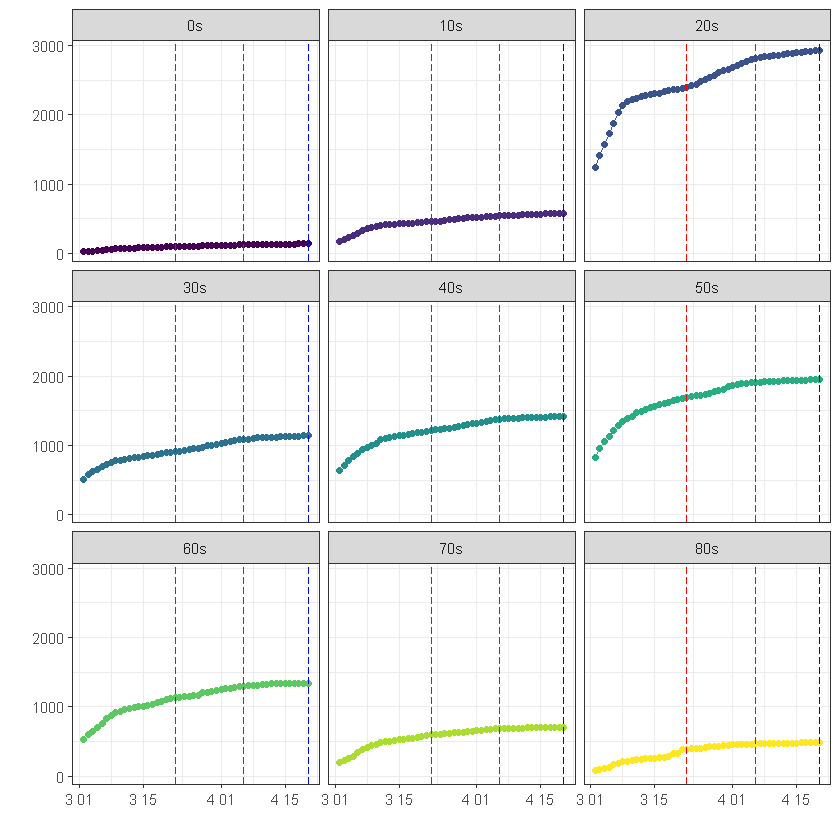

In [32]:
### 연령대별 일자별 확인자 추이
time_age$date <- ymd(time_age$date)
p <- time_age %>%
 ggplot(aes(date, confirmed, group = age, color = factor(age))) +
 geom_line() +
 scale_color_viridis_d() +
 labs(x = "", y = "") +
 theme(axis.text.x = element_text(angle=30, hjust=1)) +
 theme(legend.position = "none")

p + facet_wrap(~age, ncol=3)+
 geom_point() + theme_bw() + theme(legend.position = "none")+
 geom_vline(xintercept = as.Date("2020-03-22", "%Y-%m-%d"), linetype="longdash",  color = "red", size=0.2)+
 geom_vline(xintercept = as.Date("2020-04-06", "%Y-%m-%d"), linetype="longdash",  color = "red", size=0.2)+
 geom_vline(xintercept = as.Date("2020-04-20", "%Y-%m-%d"), linetype="longdash",  color = "blue", size=0.2)

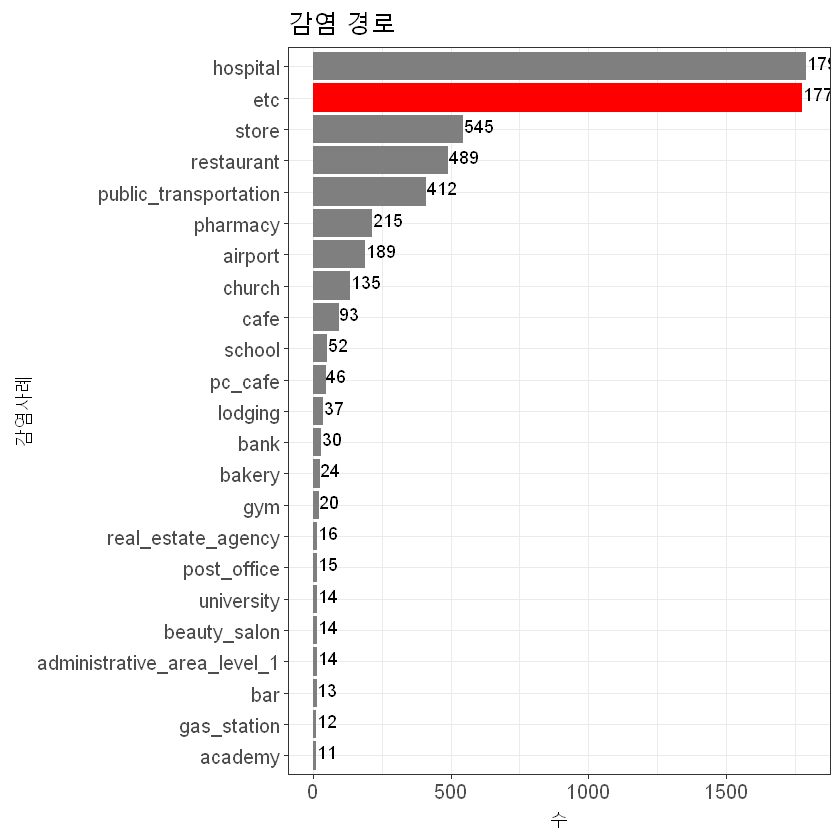

In [42]:
#### 감염 경로 확인 

temp <- patient_route %>% group_by(type) %>% summarise(n=n()) %>% arrange(-n)
fig <- temp %>% 
 ggplot(aes(x=reorder(type,n), y=n, 
  fill=factor(ifelse(type=="etc","Highlighted","Normal")))) + 
 geom_bar(stat="identity", show.legend = F) +
 scale_fill_manual(name = "type", values=c("red","grey50")) +
 xlab('감염사례') + ylab('수') +
 geom_text(aes(label = n), position=position_dodge(width=0.5), vjust=0.20, hjust=-0.03, col="black") +
 coord_flip() + theme_bw() + ggtitle("감염 경로")

fig + theme(text = element_text(size=15))


#### 가설 : 고강도 사회적 거리두기 실행, 부분적 재택근무 도입으로 경제 활동 인구의 *경로를 알 수 없는 감염* 이 줄어들지 않았을까?

EDA 1 : 경제 활동 인구를 30~60대로 가정한 후 사회적 거리 두기 기간 동안의 확진 추이를 확인함 

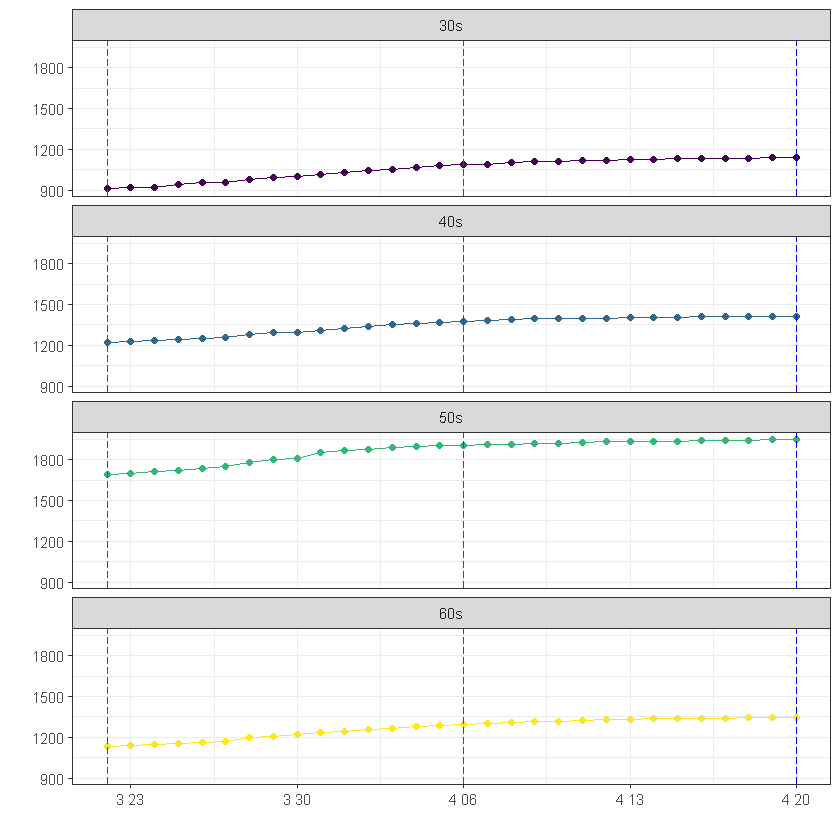

In [35]:
q <- time_age %>%
 filter(age %in% c('30s','40s','50s','60s') &
        date >= as.Date("2020-03-22"), date <= as.Date("2020-05-05")
       ) %>% 
 ggplot(aes(date, confirmed, group = age, color = factor(age))) +
 geom_line() +
 scale_color_viridis_d() +
 labs(x = "", y = "") +
 theme(axis.text.x = element_text(angle=30, hjust=1)) +
 theme(legend.position = "none")

q + facet_wrap(~age, ncol=1)+
 geom_point() + theme_bw() + theme(legend.position = "none")+
 geom_vline(xintercept = as.Date("2020-03-22", "%Y-%m-%d"), linetype="longdash",  color = "red", size=0.2)+
 geom_vline(xintercept = as.Date("2020-04-06", "%Y-%m-%d"), linetype="longdash",  color = "red", size=0.2)+
 geom_vline(xintercept = as.Date("2020-04-20", "%Y-%m-%d"), linetype="longdash",  color = "blue", size=0.2)

EDA 2 : 경제 활동 인구를 30~60대로 가정한 후 사회적 거리 두기 기간 동안의 **etc** 경로 확진 추이를 확인함

#### 경제활동 인구의 확인알 수 없는 경로 내 확진 추이

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 2 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 2 rows containing missing values (geom_point)."`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 1 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 1 rows containing missing values (geom_point)."

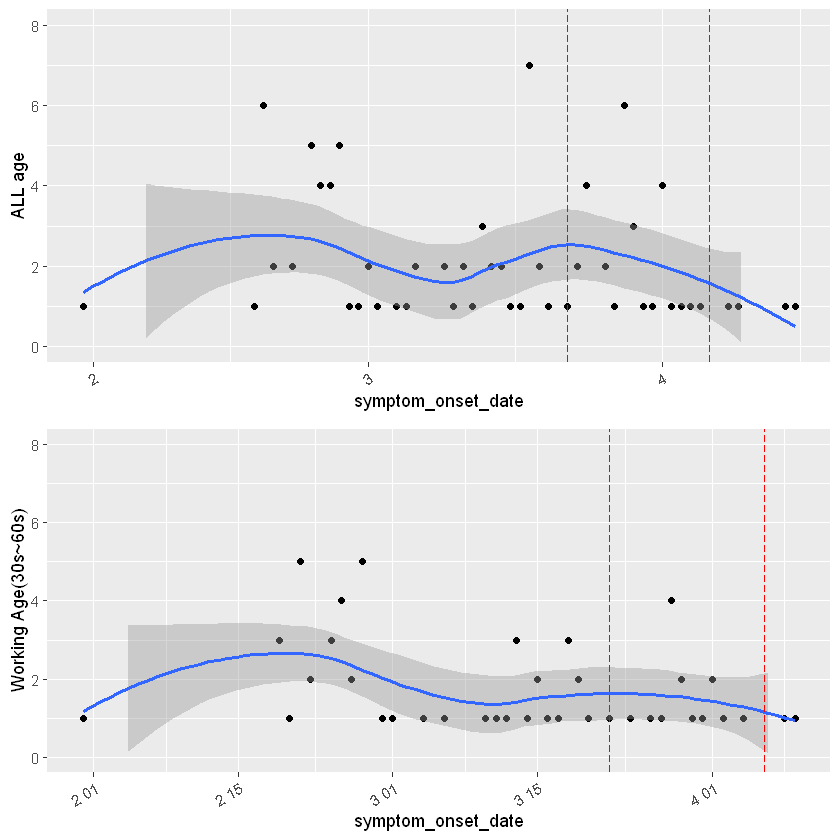

In [62]:
#### working age
work_age <- patient_info %>%
 filter(age %in% c('30s','40s','50s','60s'),infection_case == 'etc')
work_age_n <- work_age %>% 
 group_by(symptom_onset_date) %>% summarise(n=n())

work_n <- work_age_n %>% 
 ggplot(aes(symptom_onset_date, n)) + 
 geom_point()+ 
 geom_smooth()+
 ylim(0, 8)+
 labs(x = "symptom_onset_date", y = "Working Age(30s~60s)") +
 theme(axis.text.x = element_text(angle=30, hjust=1))+
 geom_vline(xintercept = as.Date("2020-03-22", "%Y-%m-%d"), linetype="longdash",  color = "red", size=0.2)+
 geom_vline(xintercept = as.Date("2020-04-06", "%Y-%m-%d"), linetype="longdash",  color = "red", size=0.2)+
 geom_vline(xintercept = as.Date("2020-04-20", "%Y-%m-%d"), linetype="longdash",  color = "blue", size=0.2)

#### all age

all_etc <- patient_info %>%
 filter(infection_case == 'etc')
all_etc_n <- all_etc %>% 
 group_by(symptom_onset_date) %>% summarise(n=n())

all_n  <- all_etc_n %>% 
 ggplot(aes(symptom_onset_date, n)) + 
 geom_point()+ 
 geom_smooth()+
 ylim(0, 8)+
 labs(x = "symptom_onset_date", y = "ALL age") +
 theme(axis.text.x = element_text(angle=30, hjust=1))+
 geom_vline(xintercept = as.Date("2020-03-22", "%Y-%m-%d"), linetype="longdash",  color = "red", size=0.2)+
 geom_vline(xintercept = as.Date("2020-04-06", "%Y-%m-%d"), linetype="longdash",  color = "red", size=0.2)+
 geom_vline(xintercept = as.Date("2020-04-20", "%Y-%m-%d"), linetype="longdash",  color = "blue", size=0.2)

ggarrange(all_n, work_n, heights = c(0.5, 0.5),
          ncol = 1, nrow =2)


우리 국민이 어려운 가운데서도 기꺼이 일상을 희생하면서 강화된 사회적 거리두기에 함께 해주신 덕분에 극단적인 업장폐쇄나 이동 제한 조치를 하지 않고도 감염 확산 차단의 효과는 분명히 확인되었다. 

그동안 사회적 거리두기를 실시한 결과, 감염경로를 알 수 없는 확진자 수와 비율이 3월 6일에는 37건 19.8%였으나, 3월 31일에는 3건 6.1%로 감소하였다. 
또한, 자칫 대규모 집단 감염으로 확산될 수 있었던 것을 작은 규모로 통제했던 사례도 확인되었다.

In [ ]:
# 연령대별 확진자 분포
str(time_age)
time_age %>% 
 ggplot(aes(date, confirmed))+
 geom_line(aes(group=age, color=age))+
 theme_light()+
 ggtitle("Number of Confirmed patients by Age")+
 theme(plot.title = element_text(hjust=0.5))